# Threshold Scan Analysis

<div style="text-align: center">
<b>!!! If you experience problems with rendering of mathematical expressions, please download the file and launch it locally !!! </b>
</div>

### Introduction
<p style='text-align: justify'>
The threshold (THR) scan is a measurement performed to calibrate the MaPMTs. In the threshold scan the threshold changes at the constant amplitude of the signal. Each anode of the MaPMTs is conjugated with the corresponding channel and is illuminated by light. The initial threshold is set to its maximum, equal to 63. The CLARO channels start to acquire the signals
which are above the threshold and the total number of events is recorded. The process is repeated, each time decreasing the threshold by 1 until it reaches the last threshold at 0. As a result, the distribution of above-threshold events can be
produced that corresponds to the integral distribution of the single photoelectron spectrum. The distribution allows to determine the working point $W_{P}$ of a channel which is the most optimal threshold that separates the signal from
the noise.
</p>
    
<p style='text-align: justify'>
The purpose of this analysis is to calculate, for all the channels, the working points required for proper calibration of Multi-Anode Photomultiplier Tubes.
</p>
   
<p style='text-align: justify'>
The following notebook analyses the Elementary Cell of R-type and H-type in terms of THR. It saves all the generated plots in the \output file. As there are a lot of plots, only the first plot is shown in the following notebook.
</p>

### Procedure
1. Extract the mapping data.
2. Extract the measurement data.
3. Calculate $W_{P}$ for each channel.
4. Exclude disabled channels.
5. Produce 2D histograms of a scheme of anodes and $W_{P}$ for each Elementary Cell.
6. Produce 1D histogram of $W_{P}$ for each channel.
7. Produce THR distribution for each channel.

### Libraries
Importing essential libraries: numpy, pandas, matplotlib and seaborn.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

### Load selection
Load refers to a complete measurement of a set of 4 Elementary Cells. The data has been uploaded for 10 loads from two stations.
- To select a station, provide "S1" or "S2".
- To select a load, provide a number from "0001" up to "00005".
- To select the type of an Elementary Cell, provide either "R" (for loads "0001", "0002" and "0003") or "H" (for loads "0004" and "0005").

In [2]:
station = "S1"
load = "0001"
ectype = "R"

### Mapping data
Extraction of the mapping data for an Elementary Cell of R-Type and H-Type. Identification is required to be included in the plots as there are 1024 channels for the R-type and 256 channels for the H-type Elementary Cell.

In [3]:
ECs_df = pd.DataFrame()

In [4]:
def Mapping(ectype):
    
    map_IDs = []
    map_ECs = []
    map_PMTs = []
    map_anodes = []
    
    if ectype == 'R':
        with open('mapping/R_Map.txt') as file:
            map_data = file.readlines()[1:]
    elif ectype == "H":
        with open('mapping/H_Map.txt') as file:
            map_data = file.readlines()[1:]
    else:
        raise ValueError('Wrong type of an Elementary Cell.')

    for i in range(0, len(map_data)):
        map_channel = map_data[i].split(' ')

        map_ID = ' '.join(map_channel[0:4])
        map_IDs.append(map_ID)

        map_EC = int(map_channel[4])
        map_ECs.append(map_EC)

        if ectype == 'R':
            map_PMT = map_channel[5]
            map_PMTs.append(map_PMT)
            
            map_anode = int(map_channel[6])
            map_anodes.append(map_anode)
        elif ectype == 'H':
            map_anode = int(map_channel[5])
            map_anodes.append(map_anode)

    map_IDs = np.array(map_IDs)
    map_ECs = np.array(map_ECs)
    if ectype == 'R':
        map_PMTs = np.array(map_PMTs)
    map_anodes = np.array(map_anodes)

    ECs_df['ID'] = map_IDs
    ECs_df['EC'] = map_ECs
    if ectype == 'R':
        ECs_df['PMT'] = map_PMTs
    ECs_df['Anode'] = map_anodes

In [5]:
Mapping(ectype)

In [6]:
ECs_df

,ID,EC,PMT,Anode
0,0 0 0 0,3,D,37
1,0 0 0 1,3,D,45
2,0 0 0 2,3,D,38
3,0 0 0 3,3,D,46
4,0 0 0 4,3,D,39
...,...,...,...,...
1019,7 1 7 3,2,B,6
1020,7 1 7 4,2,B,15
1021,7 1 7 5,2,B,7
1022,7 1 7 6,2,B,16


### Measurement data
Extraction of the measurement data for the specified load. $W_{P}$ is calculated immediately. To have a certainty that the noise is cut off completely, the working point is established slightly higher: by five threshold steps higher to the one obtained. Such operation cuts slightly the signal but blocks the electronic noise substantially. The order of the measurement data matches the mapping data hence no additional action is required.

In [7]:
def Data(station, load, ectype):
    
    with open(f'data/station-{station[1]}/Load_{load}_{ectype}_{station}/THR_1000V_offset1.txt') as file:
        data = file.readlines()[10:]
        
    IDs = []
    counts = []
    working_points = []
    
    for i in range(0,len(data)):
        data_channel = data[i]

        ID = data_channel.split("\t")[0:4]
        IDs.append(ID)  

        count = [int(x) for x in data_channel.split("\t")[4:]]
        counts.append(count)
        
        working_point = 64 - len([x for x in count if x<9000000]) + 5
        working_points.append(working_point)

    IDs = np.array(IDs)
    counts = np.array(counts)
    working_points = np.array(working_points)
    
    IDs_list = IDs.tolist()
    counts_list = counts.tolist()
    
    ECs_df['Channel_ID'] = IDs_list
    ECs_df['Counts'] = counts_list
    ECs_df['Working_Point'] = working_points

In [8]:
Data(station, load, ectype)

In [9]:
ECs_df

,ID,EC,PMT,Anode,Channel_ID,Counts,Working_Point
0,0 0 0 0,3,D,37,"[0, 0, 0, 0]","[19975, 20314, 20176, 20114, 19850, 20172, 200...",37
1,0 0 0 1,3,D,45,"[0, 0, 0, 1]","[20273, 20500, 20332, 20625, 20705, 20369, 202...",35
2,0 0 0 2,3,D,38,"[0, 0, 0, 2]","[19248, 19295, 19385, 19523, 19312, 19534, 193...",33
3,0 0 0 3,3,D,46,"[0, 0, 0, 3]","[19443, 19786, 19467, 19660, 19489, 19656, 196...",34
4,0 0 0 4,3,D,39,"[0, 0, 0, 4]","[18424, 18762, 18721, 18663, 18678, 18771, 189...",41
...,...,...,...,...,...,...,...
1019,7 1 7 3,2,B,6,"[7, 1, 7, 3]","[73955, 72749, 73907, 74104, 74719, 75095, 749...",35
1020,7 1 7 4,2,B,15,"[7, 1, 7, 4]","[31736, 31741, 31826, 32428, 31914, 32111, 323...",35
1021,7 1 7 5,2,B,7,"[7, 1, 7, 5]","[59654, 58934, 59397, 59564, 59799, 59796, 604...",34
1022,7 1 7 6,2,B,16,"[7, 1, 7, 6]","[33306, 33487, 33330, 33464, 33507, 33535, 336...",33


### Exclusion of disabled channels
For the H-type Elementary Cells, half of the rows are empty as the channels are turned off. Empty rows are indicated by anodes equal to 0. For the R-type Elementary Cells, no cleaning is required as all the channels are active (but the function can be run anyway).

In [10]:
def Empty_Anodes_Delete():
    ECs_df.drop(ECs_df[ECs_df['Anode']==0].index, inplace=True)
    ECs_df.reset_index(drop=True, inplace=True)

In [11]:
Empty_Anodes_Delete()

In [12]:
ECs_df

,ID,EC,PMT,Anode,Channel_ID,Counts,Working_Point
0,0 0 0 0,3,D,37,"[0, 0, 0, 0]","[19975, 20314, 20176, 20114, 19850, 20172, 200...",37
1,0 0 0 1,3,D,45,"[0, 0, 0, 1]","[20273, 20500, 20332, 20625, 20705, 20369, 202...",35
2,0 0 0 2,3,D,38,"[0, 0, 0, 2]","[19248, 19295, 19385, 19523, 19312, 19534, 193...",33
3,0 0 0 3,3,D,46,"[0, 0, 0, 3]","[19443, 19786, 19467, 19660, 19489, 19656, 196...",34
4,0 0 0 4,3,D,39,"[0, 0, 0, 4]","[18424, 18762, 18721, 18663, 18678, 18771, 189...",41
...,...,...,...,...,...,...,...
1019,7 1 7 3,2,B,6,"[7, 1, 7, 3]","[73955, 72749, 73907, 74104, 74719, 75095, 749...",35
1020,7 1 7 4,2,B,15,"[7, 1, 7, 4]","[31736, 31741, 31826, 32428, 31914, 32111, 323...",35
1021,7 1 7 5,2,B,7,"[7, 1, 7, 5]","[59654, 58934, 59397, 59564, 59799, 59796, 604...",34
1022,7 1 7 6,2,B,16,"[7, 1, 7, 6]","[33306, 33487, 33330, 33464, 33507, 33535, 336...",33


### 2D Histograms (Heatmaps)
The 2D histograms are arranged in 8x8 matrix. For the R-type, there are four 8x8 matrices where each of them is rotated by 90$^{\circ}$ to the preceeding one. For the H-type, there is only one 8x8 matrix. As there are multiple plots to be generated, only the first plot is presented in the notebook, the rest can be seen in .pdf files in the \output folder. Three kinds of histograms can be produced:
- scheme of anodes $\;\;\;$ (analysis = 'Anode'),
- $W_{P}$ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (analysis = 'Working_Point'),

Below, a figure presenting a scheme of one load of R-type (left) and H-type (right).

<img src="materials/EC_Scheme.png/" alt="Drawing" style="width: 100%;"/>

In [13]:
def Histograms_2D(station, load, ectype, analysis):
    
    if analysis == 'Anode':
        to_title = 'Numbering of Anodes'
        to_map = ListedColormap(['white'])
        to_format = None
        to_fmt = 'g'
        to_cbar = False
    elif analysis == 'Working_Point':
        to_title = 'Working Point'
        to_map = 'coolwarm'
        to_format = None
        to_fmt = 'g'
        to_cbar = True
    else:
        pass
        
    if ectype=='R':
        EC_0_PMT_A = ECs_df[(ECs_df['PMT']=='A') & (ECs_df['EC']==0)].sort_values(by='Anode')
        EC_1_PMT_A = ECs_df[(ECs_df['PMT']=='A') & (ECs_df['EC']==1)].sort_values(by='Anode')
        EC_2_PMT_A = ECs_df[(ECs_df['PMT']=='A') & (ECs_df['EC']==2)].sort_values(by='Anode')
        EC_3_PMT_A = ECs_df[(ECs_df['PMT']=='A') & (ECs_df['EC']==3)].sort_values(by='Anode')

        EC_0_PMT_B = ECs_df[(ECs_df['PMT']=='B') & (ECs_df['EC']==0)].sort_values(by='Anode')
        EC_1_PMT_B = ECs_df[(ECs_df['PMT']=='B') & (ECs_df['EC']==1)].sort_values(by='Anode')
        EC_2_PMT_B = ECs_df[(ECs_df['PMT']=='B') & (ECs_df['EC']==2)].sort_values(by='Anode')
        EC_3_PMT_B = ECs_df[(ECs_df['PMT']=='B') & (ECs_df['EC']==3)].sort_values(by='Anode')

        EC_0_PMT_C = ECs_df[(ECs_df['PMT']=='C') & (ECs_df['EC']==0)].sort_values(by='Anode')
        EC_1_PMT_C = ECs_df[(ECs_df['PMT']=='C') & (ECs_df['EC']==1)].sort_values(by='Anode')
        EC_2_PMT_C = ECs_df[(ECs_df['PMT']=='C') & (ECs_df['EC']==2)].sort_values(by='Anode')
        EC_3_PMT_C = ECs_df[(ECs_df['PMT']=='C') & (ECs_df['EC']==3)].sort_values(by='Anode')

        EC_0_PMT_D = ECs_df[(ECs_df['PMT']=='D') & (ECs_df['EC']==0)].sort_values(by='Anode')
        EC_1_PMT_D = ECs_df[(ECs_df['PMT']=='D') & (ECs_df['EC']==1)].sort_values(by='Anode')
        EC_2_PMT_D = ECs_df[(ECs_df['PMT']=='D') & (ECs_df['EC']==2)].sort_values(by='Anode')
        EC_3_PMT_D = ECs_df[(ECs_df['PMT']=='D') & (ECs_df['EC']==3)].sort_values(by='Anode')

        EC_0_PMT_C_matrix = np.array(np.array_split(EC_0_PMT_C[f'{analysis}'].values, 8))
        EC_1_PMT_C_matrix = np.array(np.array_split(EC_1_PMT_C[f'{analysis}'].values, 8))
        EC_2_PMT_C_matrix = np.array(np.array_split(EC_2_PMT_C[f'{analysis}'].values, 8))
        EC_3_PMT_C_matrix = np.array(np.array_split(EC_3_PMT_C[f'{analysis}'].values, 8))

        EC_0_PMT_D_matrix = np.rot90(np.array_split(EC_0_PMT_D[f'{analysis}'].values, 8), k = 3)
        EC_1_PMT_D_matrix = np.rot90(np.array_split(EC_1_PMT_D[f'{analysis}'].values, 8), k = 3)
        EC_2_PMT_D_matrix = np.rot90(np.array_split(EC_2_PMT_D[f'{analysis}'].values, 8), k = 3)
        EC_3_PMT_D_matrix = np.rot90(np.array_split(EC_3_PMT_D[f'{analysis}'].values, 8), k = 3)

        EC_0_PMT_A_matrix = np.rot90(np.array_split(EC_0_PMT_A[f'{analysis}'].values, 8), k = 2)
        EC_1_PMT_A_matrix = np.rot90(np.array_split(EC_1_PMT_A[f'{analysis}'].values, 8), k = 2)
        EC_2_PMT_A_matrix = np.rot90(np.array_split(EC_2_PMT_A[f'{analysis}'].values, 8), k = 2)
        EC_3_PMT_A_matrix = np.rot90(np.array_split(EC_3_PMT_A[f'{analysis}'].values, 8), k = 2)

        EC_0_PMT_B_matrix = np.rot90(np.array_split(EC_0_PMT_B[f'{analysis}'].values, 8), k = 1)
        EC_1_PMT_B_matrix = np.rot90(np.array_split(EC_1_PMT_B[f'{analysis}'].values, 8), k = 1)
        EC_2_PMT_B_matrix = np.rot90(np.array_split(EC_2_PMT_B[f'{analysis}'].values, 8), k = 1)
        EC_3_PMT_B_matrix = np.rot90(np.array_split(EC_3_PMT_B[f'{analysis}'].values, 8), k = 1)

        PMTs_A = [EC_0_PMT_A_matrix, EC_1_PMT_A_matrix, EC_2_PMT_A_matrix, EC_3_PMT_A_matrix]
        PMTs_B = [EC_0_PMT_B_matrix, EC_1_PMT_B_matrix, EC_2_PMT_B_matrix, EC_3_PMT_B_matrix]
        PMTs_C = [EC_0_PMT_C_matrix, EC_1_PMT_C_matrix, EC_2_PMT_C_matrix, EC_3_PMT_C_matrix]
        PMTs_D = [EC_0_PMT_D_matrix, EC_1_PMT_D_matrix, EC_2_PMT_D_matrix, EC_3_PMT_D_matrix]

        for EC in range(0,4):        

            fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 9))

            sns.heatmap(PMTs_A[EC], ax = ax[0,0], cmap = to_map, linewidths=0.5, linecolor='black', square = True, annot = True, annot_kws={"size": 8}, fmt=to_fmt, cbar = to_cbar, cbar_kws={'format': to_format}, xticklabels = False, yticklabels = False)
            bottom, top = ax[0,0].get_ylim()
            ax[0,0].set_ylim(bottom + 0.5, top - 0.5)
            ax[0,0].set_title(f'MaPMT A - {to_title}')

            sns.heatmap(PMTs_B[EC], ax = ax[0,1], cmap = to_map, linewidths=0.5, linecolor='black', square = True, annot = True, annot_kws={"size": 8}, fmt=to_fmt, cbar = to_cbar, cbar_kws={'format': to_format}, xticklabels = False, yticklabels = False)
            bottom, top = ax[0,1].get_ylim()
            ax[0,1].set_ylim(bottom + 0.5, top - 0.5)
            ax[0,1].set_title(f'MaPMT B - {to_title}')

            sns.heatmap(PMTs_D[EC], ax = ax[1,0], cmap = to_map, linewidths=0.5, linecolor='black', square = True, annot = True, annot_kws={"size": 8,}, fmt=to_fmt, cbar = to_cbar, cbar_kws={'format': to_format}, xticklabels = False, yticklabels = False)
            bottom, top = ax[1,0].get_ylim()
            ax[1,0].set_ylim(bottom + 0.5, top - 0.5)
            ax[1,0].set_title(f'MaPMT D - {to_title}')

            sns.heatmap(PMTs_C[EC], ax = ax[1,1], cmap = to_map, linewidths=0.5, linecolor='black', square = True, annot = True, annot_kws={"size": 8}, fmt=to_fmt, cbar = to_cbar, cbar_kws={'format': to_format}, xticklabels = False, yticklabels = False)
            bottom, top = ax[1,1].get_ylim()
            ax[1,1].set_ylim(bottom + 0.5, top - 0.5)
            ax[1,1].set_title(f'MaPMT C - {to_title}')

            fig.tight_layout()

            plt.savefig(f"output/{station}_{ectype}_{load}_THR_Histogram2D_{analysis}_EC_{EC}.pdf")
            
            if EC==0:
                plt.show()
            else:
                plt.close()
            
    elif ectype=='H':
        EC_0 = ECs_df[ECs_df['EC']==0].sort_values(by='Anode')
        EC_1 = ECs_df[ECs_df['EC']==1].sort_values(by='Anode')
        EC_2 = ECs_df[ECs_df['EC']==2].sort_values(by='Anode')
        EC_3 = ECs_df[ECs_df['EC']==3].sort_values(by='Anode')
        
        EC_0_matrix = np.rot90(np.array_split(EC_0[f'{analysis}'].values, 8), k = 2)
        EC_1_matrix = np.rot90(np.array_split(EC_1[f'{analysis}'].values, 8), k = 2)
        EC_2_matrix = np.rot90(np.array_split(EC_2[f'{analysis}'].values, 8), k = 2)
        EC_3_matrix = np.rot90(np.array_split(EC_3[f'{analysis}'].values, 8), k = 2)
        
        ECs = [EC_0_matrix, EC_1_matrix, EC_2_matrix, EC_3_matrix]
        
        for EC in range(0,4):        

            fig = plt.figure(figsize=(12,9))
            ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

            sns.heatmap(ECs[EC], ax = ax, cmap = to_map, linewidths=0.5, linecolor='black', square = True, annot = True, annot_kws={"size": 8}, fmt=to_fmt, cbar = to_cbar, cbar_kws={'format': to_format}, xticklabels = False, yticklabels = False)
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)
            ax.set_title(f'MaPMT - {to_title}')

            plt.savefig(f"output/{station}_{ectype}_{load}_THR_Histogram2D_{analysis}_EC_{EC}.pdf")
            
            if EC==0:
                plt.show()
            else:
                plt.close()
    else:
        raise ValueError('Wrong type of an Elementary Cell.')

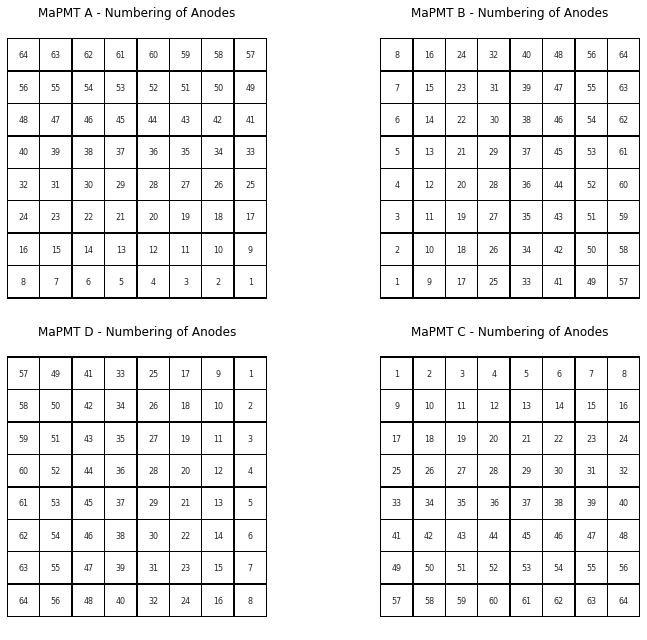

In [14]:
Histograms_2D(station, load, ectype, "Anode")

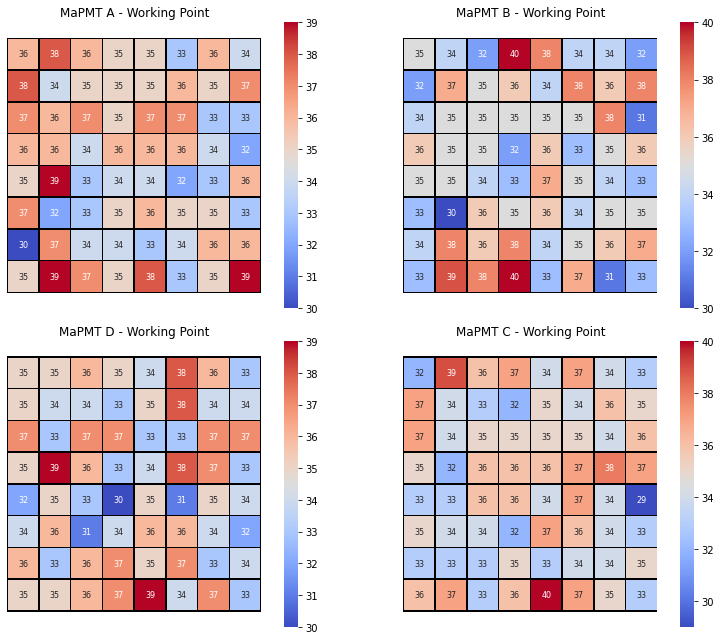

In [15]:
Histograms_2D(station, load, ectype, "Working_Point")

### 1D Histograms
The 1D histograms give an insight of the distribution of the Working Points for the whole load. One kind of histogram can be produced:
- $W_{P}$ $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (analysis = 'Working_Point').

In [16]:
def Histograms_1D(station, load, ectype, analysis):
    
    if analysis == 'Working_Point':
        to_title = 'Working Point'
        x_label = 'THR Step [-]'
        my_bins = 10
        limits = [0, 64]
    else:
        pass
        
    for EC in range(0, 4):
        if ectype=='R':
            EC_df = ECs_df[ECs_df['EC']==EC].sort_values(by=['EC', 'PMT', 'Anode']).reset_index(drop=True)
        elif ectype=='H':
            EC_df = ECs_df[ECs_df['EC']==EC].sort_values(by=['EC', 'Anode']).reset_index(drop=True)
        else:
            raise ValueError('Wrong type of an Elementary Cell.')
            
        fig = plt.figure(figsize=(12,9))
        ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])
        ax.set_title(f'{to_title}')
        ax.set_xlabel(f'{x_label}')
        ax.set_ylabel('#')
        
        a = sns.histplot(EC_df[analysis], kde=False, bins=my_bins, line_kws={'linewidth': '1', 'edgecolor': 'black'})
        a.set(xlim=limits)

        plt.savefig(f"output/{station}_{ectype}_{load}_THR_Histogram1D_{analysis}_EC_{EC}.pdf")      
        
        if EC==0:
            plt.show()
        else:
            plt.close()

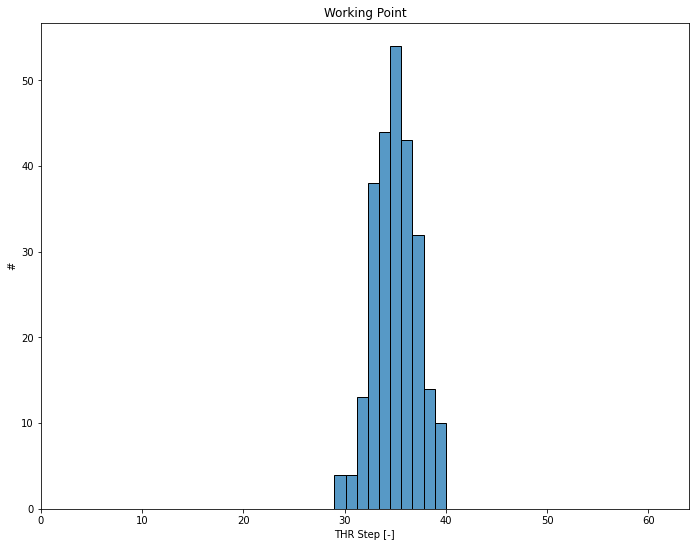

In [17]:
Histograms_1D(station, load, ectype, "Working_Point")

### THR distribution
The spectra present the distribution of the THR for each of the channel. Each channel has its own spectrum as registered counts to the threshold step. The range of the THR step goes from 0 to 63. The number of 1024 and 256 spectra are produced for R-type and H-type, respectively. In the notebook the spectrum for the first channel is presented, the rest can be found in the \output folder.

In [18]:
def Spectra(station, load, ectype, analysis):
    
    steps = range(63, -1, -1)
    
    for EC in range(0, 4):
        if ectype=='R':
            EC_df = ECs_df[ECs_df['EC']==EC].sort_values(by=['EC', 'PMT', 'Anode']).reset_index(drop=True)
        elif ectype=='H':
            EC_df = ECs_df[ECs_df['EC']==EC].sort_values(by=['EC', 'Anode']).reset_index(drop=True)
        else:
            raise ValueError('Wrong type of an Elementary Cell.')
            
        with PdfPages(f"output/{station}_{ectype}_{load}_THR_Spectrum_{analysis}_EC_{EC}.pdf") as pdf:
            for i in range(0, len(EC_df)):
                fig = plt.figure(figsize=(12,9))
                ax = fig.add_axes([0.15, 0.15, 0.75, 0.75])

                if ectype=='R':
                    ax.set_title(f'THR Distribution of PMT: {EC_df.loc[i, "PMT"]} Anode: {EC_df.loc[i, "Anode"]} (UART: {EC_df.loc[i, "ID"][0]} FEB: {EC_df.loc[i, "ID"][2]} CHIP: {EC_df.loc[i, "ID"][4]} CHANNEL: {EC_df.loc[i, "ID"][6]})')
                elif ectype=='H':
                    ax.set_title(f'THR Distribution of Anode: {EC_df.loc[i, "Anode"]} (UART: {EC_df.loc[i, "ID"][0]} FEB: {EC_df.loc[i, "ID"][2]} CHIP: {EC_df.loc[i, "ID"][4]} CHANNEL: {EC_df.loc[i, "ID"][6]})')        
                                 
                ax.set_xlabel('THR Steps (0-63)')
                ax.set_ylabel('Counts')

                ax.set_yscale('log')
                
                ax.grid(b=True, which='major', color='#666666', linestyle='-')
                plt.minorticks_on()
                ax.grid(which='minor', b=True, color='#999999', linestyle='-', alpha=0.2)
                
                ax.plot(steps, EC_df.loc[i, analysis], drawstyle='steps-mid', linewidth = 2.0)

                pdf.savefig()
                plt.rcParams.update({'figure.max_open_warning': 0})
                
                if (EC==0) & (i==0):
                    plt.show()
                else:
                    plt.close()

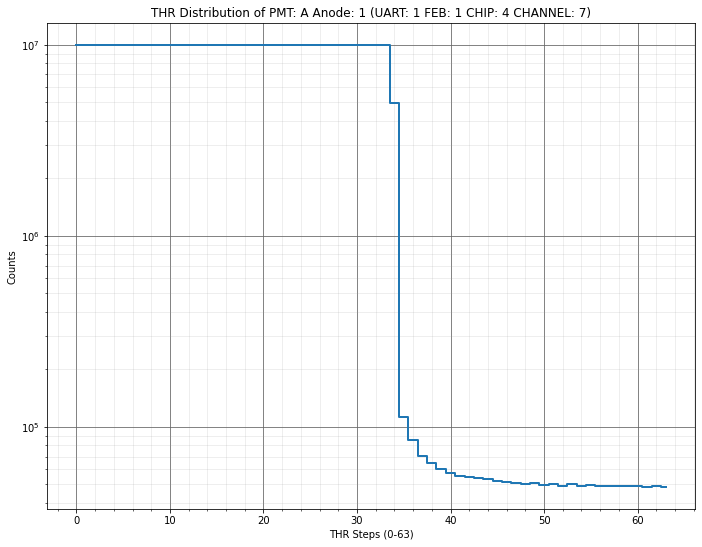

In [19]:
Spectra(station, load, ectype, 'Counts')